In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_theme(style="ticks", palette="deep")

from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import ruamel.yaml as yaml
import torch
import scipy.stats as stats

from soul_gan.datasets.utils import get_dataset, prepare_2d_gaussian_grid_data, prepare_2d_ring_data

from soul_gan.utils.general_utils import DotConfig, CONFIGS_DIR, DATA_DIR
from soul_gan.models.utils import GANWrapper

In [2]:
config = DotConfig(yaml.round_trip_load(Path(CONFIGS_DIR, 'gan_configs/ring-mlp.yml').open('r'))).gan_config

mean = np.array(config.train_transform.Normalize.mean)
std = np.array(config.train_transform.Normalize.std)

In [3]:
sample, modes = prepare_2d_ring_data(int(5e3))
np.savez(
    Path(DATA_DIR, '8_gaussians_modes.npz').open('wb'), 
    centroids=(modes - mean[None, :]) / std[None, :], 
    closest_pts=(modes - mean[None, :]) / std[None, :], 
    sigmas=np.ones(len(modes))*0.02 / std[0],
    priors=np.ones(len(modes)) / len(modes))

In [12]:
kind = 'ring'

dataset = get_dataset(f"gaussians_{kind}", int(5e3))
dataset[0]

tensor([2.0247, 0.0031])

In [23]:
def plot(target, feature, step_size, step=1000):
    path = Path(f'../log/{feature}_{target}Target/mlp_{kind}_{step_size}')
    xs = np.load(Path(path, f'images/{step}.npy'))

    plt.figure(figsize=(5, 5))
    plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=10)
    plt.axis('equal')
    plt.grid()

    Path(path, 'figs').mkdir(exist_ok=True)
    plt.savefig(Path(path, f'figs/{kind}_{step_size}_2d_{step}.png'))

In [24]:
step_size = 0.001

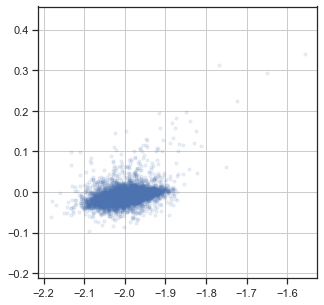

In [25]:
target = 'Discriminator'
feature = 'dumb_feature'

plot(target, feature, step_size, step=0)

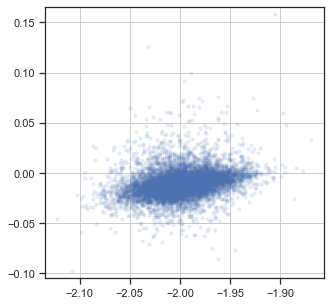

In [26]:
target = 'Discriminator'
feature = 'dumb_feature'

plot(target, feature, step_size)

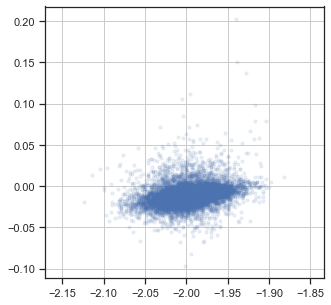

In [27]:
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size)
